# **Proclub Teknofest 2020 Report**

### **Data Collecting And Cleaning**

In [ ]:
!pip install seaborn --upgrade

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = '/content/drive/My Drive/Dataset/'
tekno = pd.read_excel(path + 'Teknofest 2020 Participants.xlsx')

In [3]:
tekno.drop(['linkedin_url', 'cv_url', 'ktm_url', 'letter_url', 'division'], axis=1, inplace=True)

### **Data Wrangling**

In [4]:
print("Total Data :", len(tekno))

Total Data : 78


In [5]:
tekno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   nim            78 non-null     int64 
 1   division_name  78 non-null     object
 2   name           78 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.0+ KB


In [6]:
print(tekno.isnull().sum())

nim              0
division_name    0
name             0
dtype: int64


### **Modelling**

In [7]:
def get_jurusan(x):
    if str(x)[:4:] == '1301':
          return 'S1 Informatika'
    elif str(x)[:4:] == '1302':
          return 'S1 RPL'
    elif str(x)[:4:] == '1103':
          return 'S1 Teknik Komputer'           
    elif str(x)[:4:] == '6706':
          return 'D3 RPLA'
    elif str(x)[:4:] == '1202':
          return 'S1 Sistem Informasi'   
    elif str(x)[:4:] == '1304':
          return 'S1 Informatika PJJ'  
    elif str(x)[:4:] == '1402':
          return 'S1 Akuntansi'  

tekno['jurusan'] = tekno['nim'].apply(get_jurusan)


In [8]:
def get_angkatan(x):
    if str(x)[4:6] == '20':
          return 2020
    elif str(x)[4:6] == '19':
          return 2019
    elif str(x)[4:6] == '18':
          return 2018            

tekno['angkatan'] = tekno['nim'].apply(get_angkatan)

In [9]:
SE = tekno.loc[(tekno['division_name'] == 'SE')] 
PD = tekno.loc[(tekno['division_name'] == 'PD')] 
BA = tekno.loc[(tekno['division_name'] == 'BA')] 

In [10]:
count_jurusan_se = [
                    len(SE.loc[(SE['jurusan'] == 'S1 Informatika')]), 
                    len(SE.loc[(SE['jurusan'] == 'S1 RPL')]), 
                    len(SE.loc[(SE['jurusan'] == 'S1 Teknik Komputer')]), 
                    len(SE.loc[(SE['jurusan'] == 'D3 RPLA')]), 
                    len(SE.loc[(SE['jurusan'] == 'S1 Sistem Informasi')]), 
                    len(SE.loc[(SE['jurusan'] == 'S1 Informatika PJJ')]), 
                    len(SE.loc[(SE['jurusan'] == 'S1 Akuntansi')])
                   ]

In [11]:
count_angkatan_se = [
                     len(SE.loc[(SE['angkatan'] == 2020)]), 
                     len(SE.loc[(SE['angkatan'] == 2019)]), 
                     len(SE.loc[(SE['angkatan'] == 2018)])
                    ]

In [23]:
count_angkatan_pd = [
                     len(PD.loc[(PD['angkatan'] == 2020)]), 
                     len(PD.loc[(PD['angkatan'] == 2019)])
                    ]

In [26]:
count_angkatan_ba = [
                     len(BA.loc[(BA['angkatan'] == 2020)]), 
                     len(BA.loc[(BA['angkatan'] == 2019)])
                    ]

In [12]:
count_angkatan = [
                  len(tekno.loc[(tekno['angkatan'] == 2020)]), 
                  len(tekno.loc[(tekno['angkatan'] == 2019)]), 
                  len(tekno.loc[(tekno['angkatan'] == 2018)])
                 ]

In [13]:
def show_pie(label, data, legend_title) :
    fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), 
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title= legend_title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.show()

### **Participant : Division**

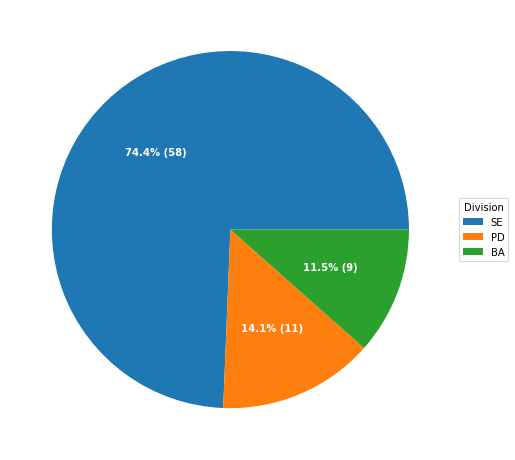

In [14]:
label = ['SE', 'PD', 'BA']
data = [len(SE), len(PD), len(BA)]

show_pie(label, data, "Division")

### **Participant : Generation**


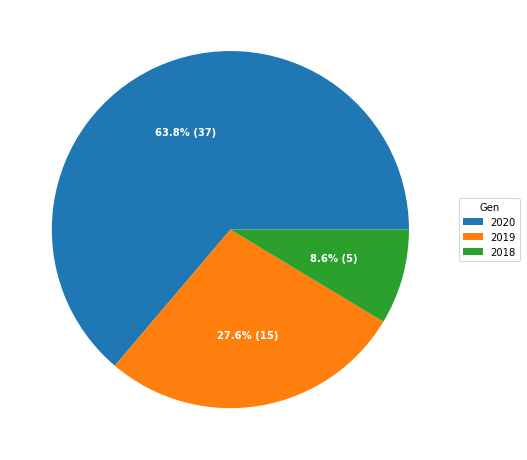

In [17]:
label = ['2020', '2019', '2018']
data = count_angkatan

show_pie(label, data, "Gen")

### **Generation Spread : Division**

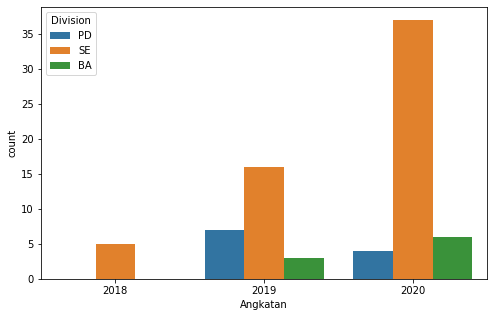

In [76]:
plt.figure(figsize=(8,5))
sns.countplot(x='angkatan', hue='division_name', data=tekno)
plt.legend(title='Division',loc="upper left")
plt.xlabel('Angkatan')
plt.show()

### **SE Division : Major Proportions**

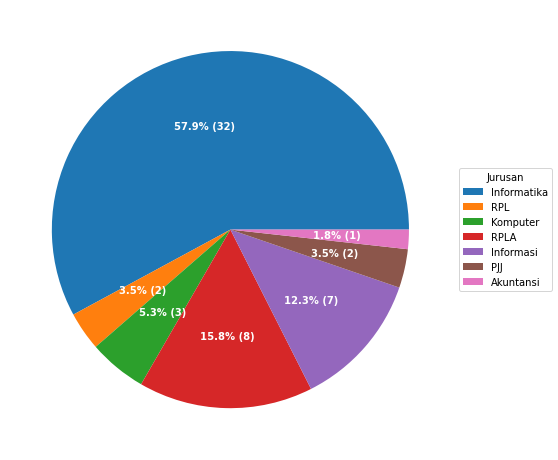

In [15]:
label = [
         'S1 Informatika', 
         'S1 RPL', 
         'S1 Teknik Komputer', 
         'D3 RPLA', 
         'S1 Sistem Informasi', 
         'S1 Informatika PJJ', 
         'S1 Akuntansi'
        ]
        
show_pie(label, count_jurusan_se, "Jurusan")

### **SE Division : Generation**

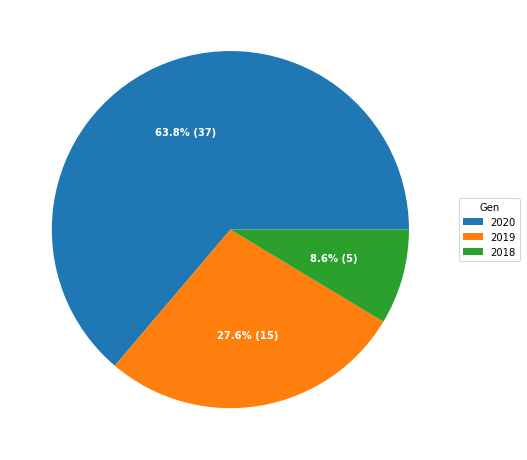

In [18]:
label = ['2020', '2019', '2018']
show_pie(label, count_angkatan_se, "Gen")

### **PD Division : Generation**

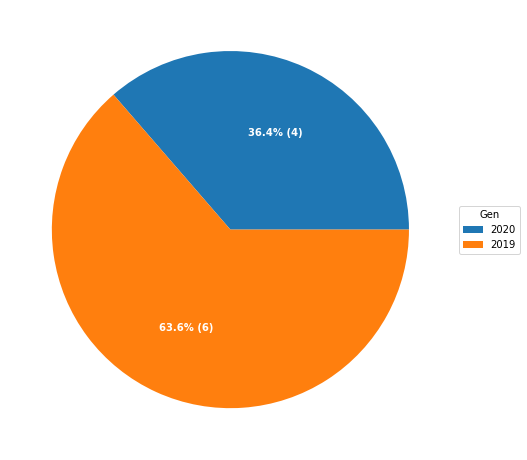

In [25]:
label = ['2020', '2019']
show_pie(label, count_angkatan_pd, "Gen")

### **BA Division : Generation**

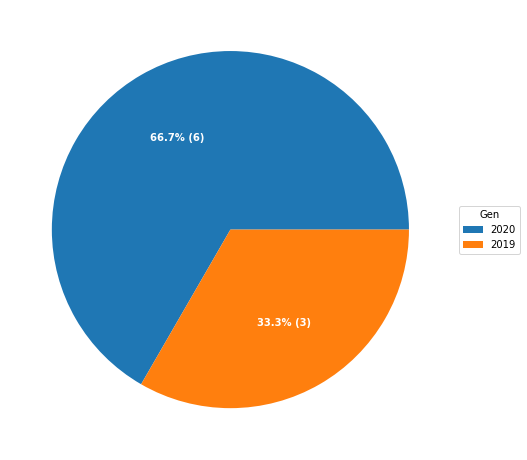

In [27]:
label = ['2020', '2019']
show_pie(label, count_angkatan_ba, "Gen")